In [1]:
import pandas as pd

# Load data
df = pd.read_csv("thyroidDF (1).csv")

# Show structure
print(df.shape)
print(df.columns)
print(df.head())


(9172, 31)
Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')
   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_tre

In [2]:
# Check how many missing values are present in each column
missing = df.isnull().sum().sort_values(ascending=False)

# Display missing values
print("Missing values in each column:\n", missing)


Missing values in each column:
 TBG                    8823
T3                     2604
TSH                     842
T4U                     809
FTI                     802
TT4                     442
sex                     307
thyroid_surgery           0
I131_treatment            0
age                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
hypopituitary             0
tumor                     0
goitre                    0
lithium                   0
query_hyperthyroid        0
query_hypothyroid         0
T3_measured               0
psych                     0
T4U_measured              0
TT4_measured              0
TSH_measured              0
FTI_measured              0
TBG_measured              0
referral_source           0
target                    0
patient_id                0
dtype: int64


In [3]:
# Drop 'patient_id' (identifier) and 'TBG' (96% missing)
df.drop(columns=["patient_id", "TBG"], inplace=True)
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'target']


In [4]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Columns:", num_cols.tolist())
print("Categorical Columns:", cat_cols.tolist())


Numerical Columns: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Categorical Columns: ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'target']


In [5]:
from sklearn.impute import SimpleImputer

# Use mean to fill missing numerical values
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])


In [6]:
# Use mode (most frequent) to fill missing categorical values
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-6-3495878085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to convert categories to numbers
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# Eda

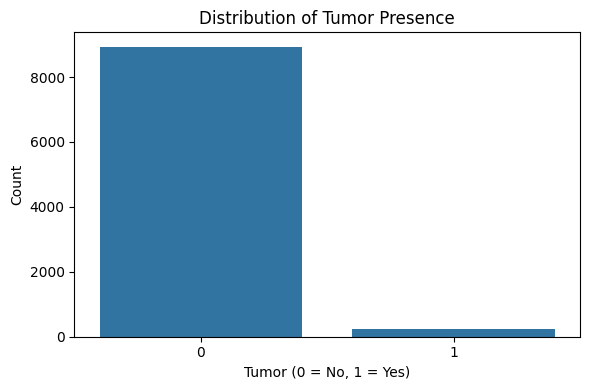

Tumor Distribution:

       Count  Percentage (%)
tumor                       
0       8931           97.37
1        241            2.63


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="tumor", data=df)
plt.title("Distribution of Tumor Presence")
plt.xlabel("Tumor (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print value counts and percentage
tumor_counts = df["tumor"].value_counts()
tumor_percent = tumor_counts / tumor_counts.sum() * 100

print("Tumor Distribution:\n")
print(pd.DataFrame({
    "Count": tumor_counts,
    "Percentage (%)": tumor_percent.round(2)
}))



In [9]:
# Extract numeric features
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Summary statistics
summary = numeric_df.describe().T

# Add Interquartile Range (IQR)
summary["IQR"] = summary["75%"] - summary["25%"]

# Display summary
print("Summary statistics for numerical features:\n")
print(summary.round(2))


Summary statistics for numerical features:

                      count    mean      std   min    25%     50%     75%  \
age                  9172.0   73.56  1183.98  1.00  37.00   55.00   68.00   
sex                  9172.0    0.30     0.46  0.00   0.00    0.00    1.00   
on_thyroxine         9172.0    0.14     0.34  0.00   0.00    0.00    0.00   
query_on_thyroxine   9172.0    0.02     0.13  0.00   0.00    0.00    0.00   
on_antithyroid_meds  9172.0    0.01     0.11  0.00   0.00    0.00    0.00   
sick                 9172.0    0.04     0.19  0.00   0.00    0.00    0.00   
pregnant             9172.0    0.01     0.11  0.00   0.00    0.00    0.00   
thyroid_surgery      9172.0    0.01     0.12  0.00   0.00    0.00    0.00   
I131_treatment       9172.0    0.02     0.13  0.00   0.00    0.00    0.00   
query_hypothyroid    9172.0    0.07     0.25  0.00   0.00    0.00    0.00   
query_hyperthyroid   9172.0    0.07     0.26  0.00   0.00    0.00    0.00   
lithium              9172.0    0

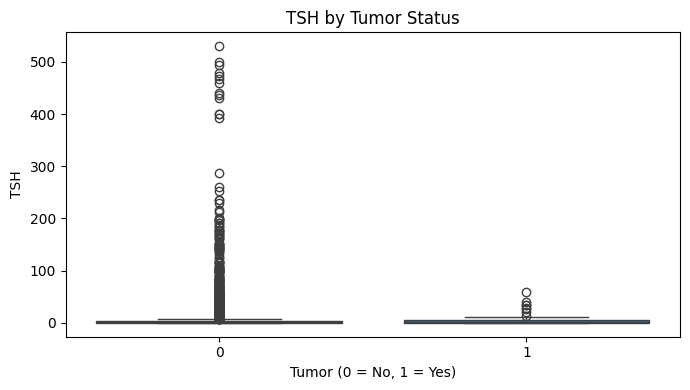

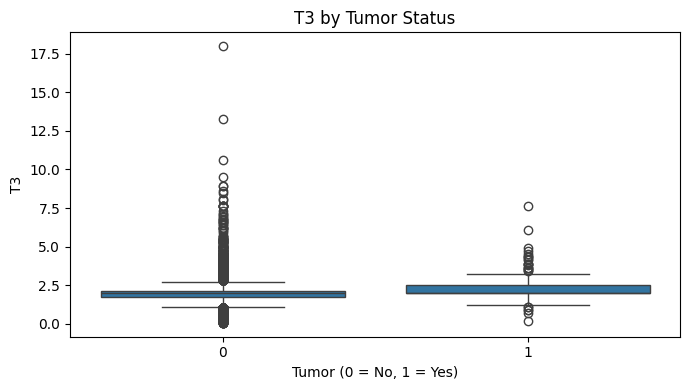

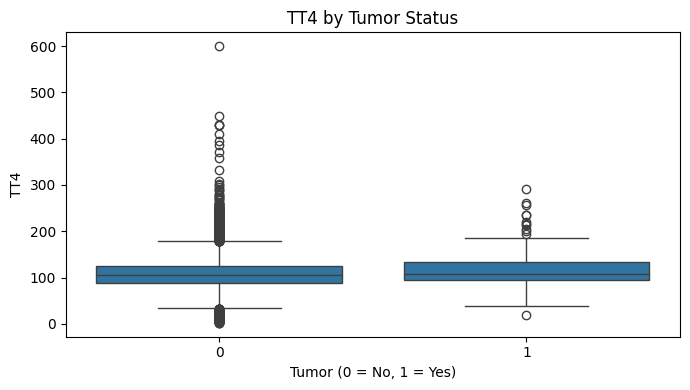

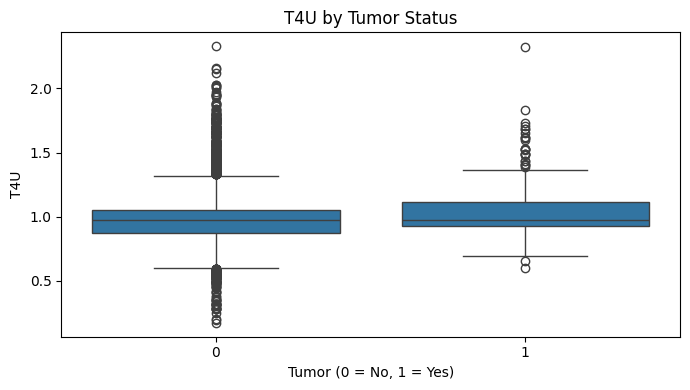

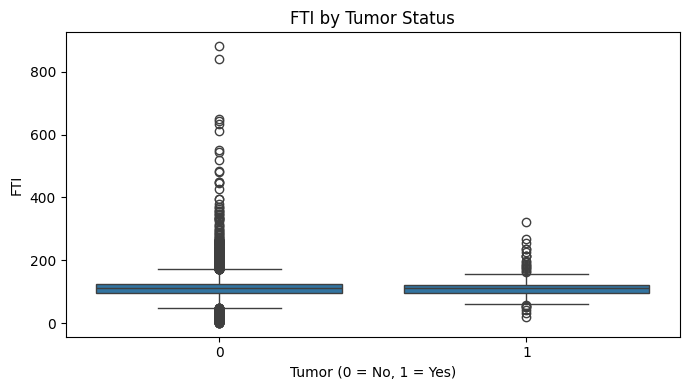

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant hormone features
hormone_features = ["TSH", "T3", "TT4", "T4U", "FTI"]

# Generate boxplots for each feature
for feature in hormone_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x="tumor", y=feature, data=df)
    plt.title(f"{feature} by Tumor Status")
    plt.xlabel("Tumor (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


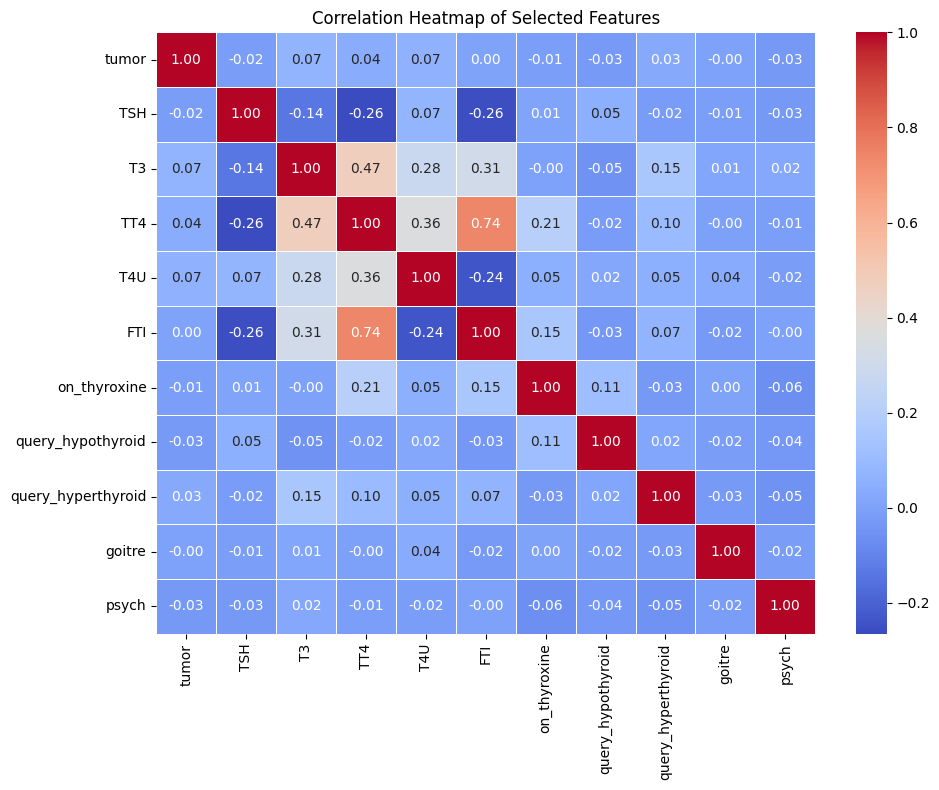

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on a subset of relevant features including the target 'tumor'
selected_features = [
    "tumor", "TSH", "T3", "TT4", "T4U", "FTI", "on_thyroxine",
    "query_hypothyroid", "query_hyperthyroid", "goitre", "psych"
]

# Compute correlation matrix for selected features
subset_corr = df[selected_features].corr()

# Plot with annotations for clearer values
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.tight_layout()
plt.show()


In [12]:
!pip install -U scikit-learn imbalanced-learn



In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=["tumor"])
y = df["tumor"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new class distribution
print(y_train_balanced.value_counts())


tumor
0    7144
1    7144
Name: count, dtype: int64


In [14]:
from sklearn.svm import SVC

# Train SVM with class_weight to handle imbalance
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix

y_pred_svm = svm_model.predict(X_test)

print(" Evaluation: Support Vector Machine (SVM)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


 Evaluation: Support Vector Machine (SVM)
Confusion Matrix:
 [[1283  504]
 [  29   19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      1787
           1       0.04      0.40      0.07        48

    accuracy                           0.71      1835
   macro avg       0.51      0.56      0.45      1835
weighted avg       0.95      0.71      0.81      1835



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

print(" Evaluation: Random Forest")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


 Evaluation: Random Forest
Confusion Matrix:
 [[1781    6]
 [  47    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1787
           1       0.14      0.02      0.04        48

    accuracy                           0.97      1835
   macro avg       0.56      0.51      0.51      1835
weighted avg       0.95      0.97      0.96      1835



In [16]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight for imbalance
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Train XGBoost with imbalance parameter
xgb_model = XGBClassifier(scale_pos_weight=pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)

print(" Evaluation: XGBoost")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Evaluation: XGBoost
Confusion Matrix:
 [[1750   37]
 [  43    5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1787
           1       0.12      0.10      0.11        48

    accuracy                           0.96      1835
   macro avg       0.55      0.54      0.54      1835
weighted avg       0.95      0.96      0.95      1835



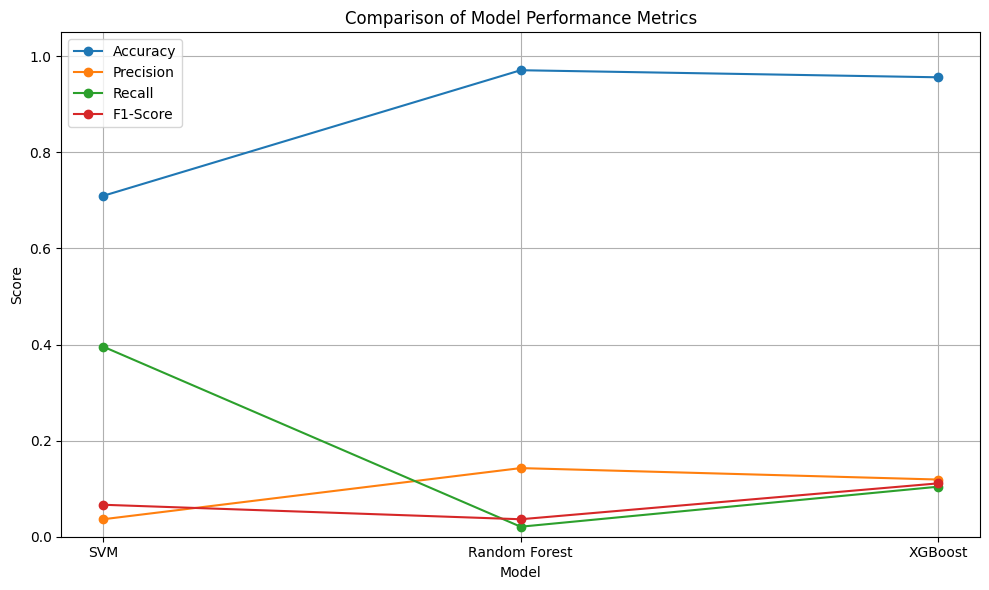

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Collect performance metrics
model_names = ['SVM', 'Random Forest', 'XGBoost']
y_preds = [y_pred_svm, y_pred_rf, y_pred_xgb]

# Compute metrics for each model
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for y_pred in y_preds:
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))

# Plotting
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics.keys()):
    plt.plot(model_names, metrics[metric], marker='o', label=metric)

plt.title("Comparison of Model Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


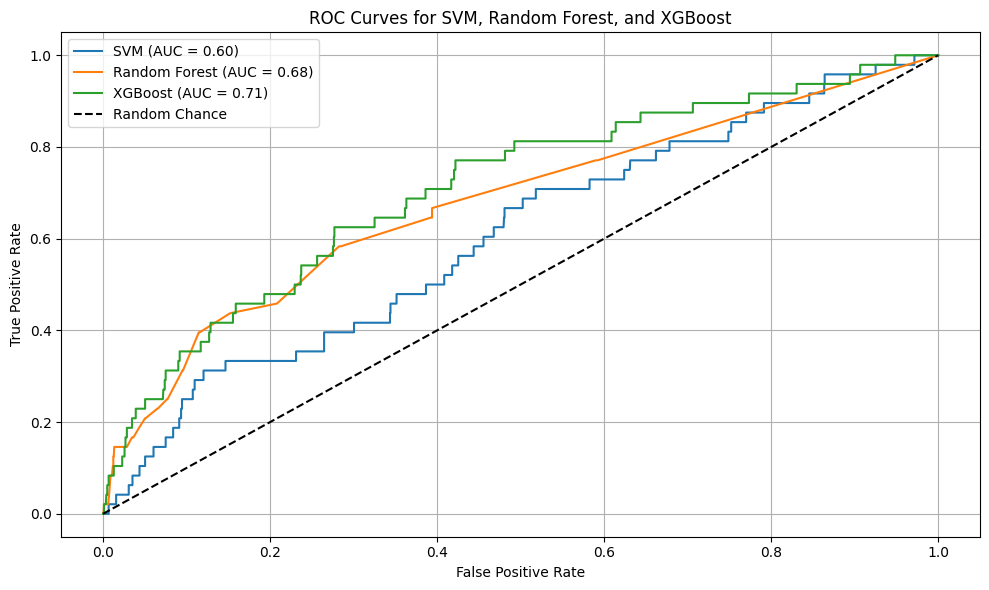

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability scores for ROC AUC
y_score_svm = svm_model.decision_function(X_test)
y_score_rf = rf_model.predict_proba(X_test)[:, 1]
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)

auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")

plt.title("ROC Curves for SVM, Random Forest, and XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


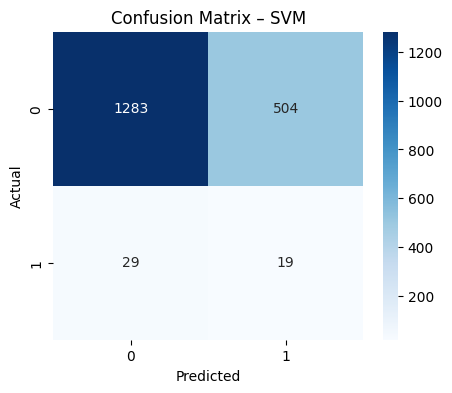

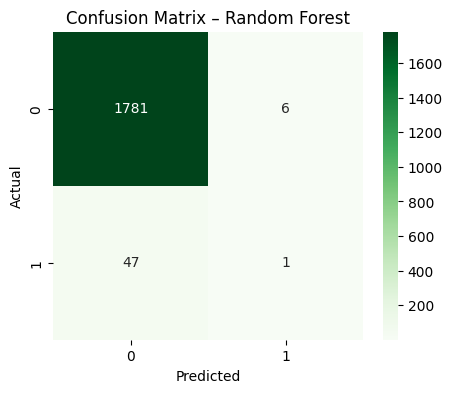

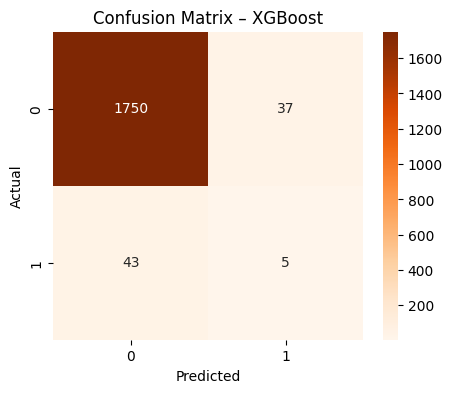

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot SVM Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Random Forest Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot XGBoost Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix – XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning - Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    scoring='accuracy',  # prioritize recall for minority class
    cv=3,
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest accuracy Score:", rf_grid.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest accuracy Score: 0.9720595538477745


In [27]:
# Hyperparameter Tuning - XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [pos_weight, pos_weight*1.5, pos_weight*2]  # based on imbalance ratio
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost accurcy Score:", xgb_grid.best_score_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:11:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': np.float64(55.523316062176164), 'subsample': 0.8}
Best XGBoost accurcy Score: 0.9657897010324161
